In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [ ]:
red = np.loadtxt('ex3red.dat')
blue = np.loadtxt('ex3blue.dat')

In [ ]:
plt.plot(red[:,0], red[:,1], 'ro')
plt.plot(blue[:,0], blue[:,1], 'bo')
plt.axis([0, 10, 0, 10])
plt.show()

In [ ]:
class LDA:
    def __init__(self):
        self.mu1 = None
        self.mu2 = None
        self.sigma = None
        self.w = None

    def fit(self, red, blue):
        self.mu1 = np.mean(red, axis=0)
        self.mu2 = np.mean(blue, axis=0)
        self.sigma = np.cov(red.T) + np.cov(blue.T)
        self.w = np.linalg.inv(self.sigma).dot(self.mu1 - self.mu2)
        self.w = self.w / np.linalg.norm(self.w)

    def projection(self, x):
        return self.w.dot(x)

lda = LDA()
lda.fit(red, blue)

plt.axline((0, 0), (lda.w[0], lda.w[1]), color='black')
plt.plot(red[:,0], red[:,1], 'ro')
plt.plot(blue[:,0], blue[:,1], 'bo')

red_proj_x = np.array([lda.projection(x) for x in red])
blue_proj_x = np.array([lda.projection(x) for x in blue])
red_proj_y = red_proj_x * lda.w[1] / lda.w[0]
blue_proj_y = blue_proj_x * lda.w[1] / lda.w[0]

plt.plot(red_proj_x, red_proj_y, 'ro')
plt.plot(blue_proj_x, blue_proj_y, 'bo')

plt.axis([0, 10, 0, 10])
plt.show()

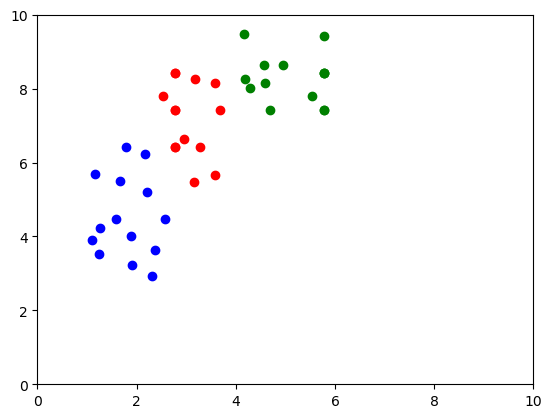

In [26]:
green = np.loadtxt('ex3green.dat')

plt.plot(red[:,0], red[:,1], 'ro')
plt.plot(blue[:,0], blue[:,1], 'bo')
plt.plot(green[:,0], green[:,1], 'go')
plt.axis([0, 10, 0, 10])
plt.show()

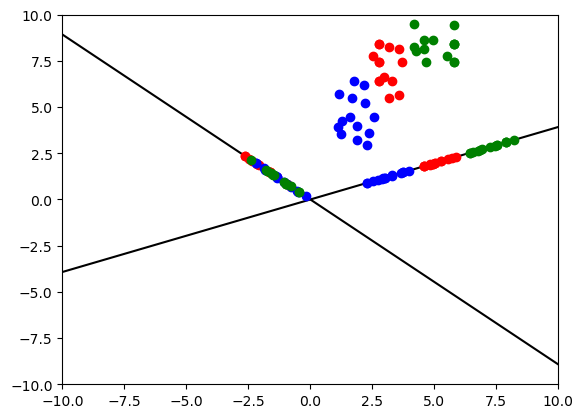

In [ ]:
class LDAFor3:
    def __init__(self):
        self.mu1 = None
        self.mu2 = None
        self.mu3 = None
        self.mu = None
        self.sigma = None
        self.b = None

        self.w1 = None
        self.w2 = None

    def fit(self, red, blue, green):
        self.mu1 = np.mean(red, axis=0)
        self.mu2 = np.mean(blue, axis=0)
        self.mu3 = np.mean(green, axis=0)
        self.mu = (self.mu1 + self.mu2 + self.mu3) / 3

        s_red = np.cov(red.T)
        s_blue = np.cov(blue.T)
        s_green = np.cov(green.T)
        self.sigma = s_red + s_blue + s_green

        b_red = len(red) * np.outer(self.mu1 - self.mu, self.mu1 - self.mu)
        b_blue = len(blue) * np.outer(self.mu2 - self.mu, self.mu2 - self.mu)
        b_green = len(green) * np.outer(self.mu3 - self.mu, self.mu3 - self.mu)

        self.b = b_red + b_blue + b_green

        self.w = np.dot(np.linalg.inv(self.sigma), self.b)
        values, vectors = np.linalg.eig(self.w)
        self.w1 = vectors[:, np.argmax(values)]
        self.w2 = vectors[:, np.argmin(values)]


    def projection(self, x):
        return np.array([self.w1.dot(x), self.w2.dot(x)])
    
lda3 = LDAFor3()
lda3.fit(red, blue, green)

plt.axline((0, 0), (lda3.w1[0], lda3.w1[1]), color='black')
plt.axline((0, 0), (lda3.w2[0], lda3.w2[1]), color='black')
plt.plot(red[:, 0], red[:, 1], 'ro')
plt.plot(blue[:, 0], blue[:, 1], 'bo')
plt.plot(green[:, 0], green[:, 1], 'go')

red_proj_x = np.array([lda3.projection(x)[0] * lda3.w1[0] for x in red])
red_proj_y = np.array([x * lda3.w1[1] / lda3.w1[0] for x in red_proj_x])
green_proj_x = np.array([lda3.projection(x)[0] * lda3.w1[0] for x in green])
green_proj_y = np.array([x * lda3.w1[1] / lda3.w1[0] for x in green_proj_x])
blue_proj_x = np.array([lda3.projection(x)[0] * lda3.w1[0] for x in blue])
blue_proj_y = np.array([x * lda3.w1[1] / lda3.w1[0] for x in blue_proj_x])

plt.plot(red_proj_x, red_proj_y, 'ro')
plt.plot(blue_proj_x, blue_proj_y, 'bo')
plt.plot(green_proj_x, green_proj_y, 'go')

red_proj_x = np.array([lda3.projection(x)[1] * lda3.w2[0] for x in red])
red_proj_y = np.array([x * lda3.w2[1] / lda3.w2[0] for x in red_proj_x])
green_proj_x = np.array([lda3.projection(x)[1] * lda3.w2[0] for x in green])
green_proj_y = np.array([x * lda3.w2[1] / lda3.w2[0] for x in green_proj_x])
blue_proj_x = np.array([lda3.projection(x)[1] * lda3.w2[0] for x in blue])
blue_proj_y = np.array([x * lda3.w2[1] / lda3.w2[0] for x in blue_proj_x])

plt.plot(red_proj_x, red_proj_y, 'ro')
plt.plot(blue_proj_x, blue_proj_y, 'bo')
plt.plot(green_proj_x, green_proj_y, 'go')

plt.axis([-10, 10, -10, 10])
plt.show()